In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## data preprocessing

In [2]:
data = pd.read_csv('../input/insurance/insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# i will keep raw_data copy and use data copy for preprocessing
raw_data =data.copy()
pd.unique(data['region'])

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
region_dummies = pd.get_dummies(data['region'], drop_first = True )
data = data.drop(['region'], axis = 1)
data_1 = pd.concat([data, region_dummies], axis = 1)
data_1.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'], dtype=object)

In [5]:
# so northeast will be the benchmark for region 
#rearranging data columns
data_1.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest region',
       'southeast region', 'southwest region']
data_1.head()

,age,sex,bmi,children,smoker,charges,northwest region,southeast region,southwest region
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


In [6]:
data_1['sex'] = data_1['sex'].map({'female':0, 'male':1})
data_1['smoker'] = data_1['smoker'].map({'no':0, 'yes':1})
data_processed = data_1
data_processed.head()

,age,sex,bmi,children,smoker,charges,northwest region,southeast region,southwest region
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# EDA

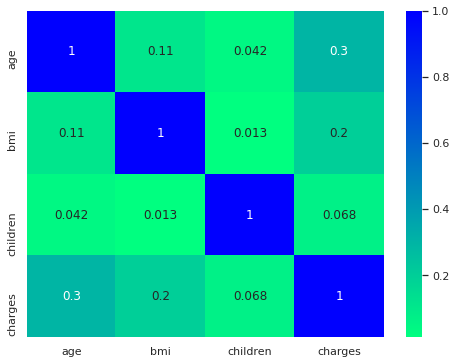

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(raw_data.corr(),annot=True,cmap="winter_r")
plt.show()

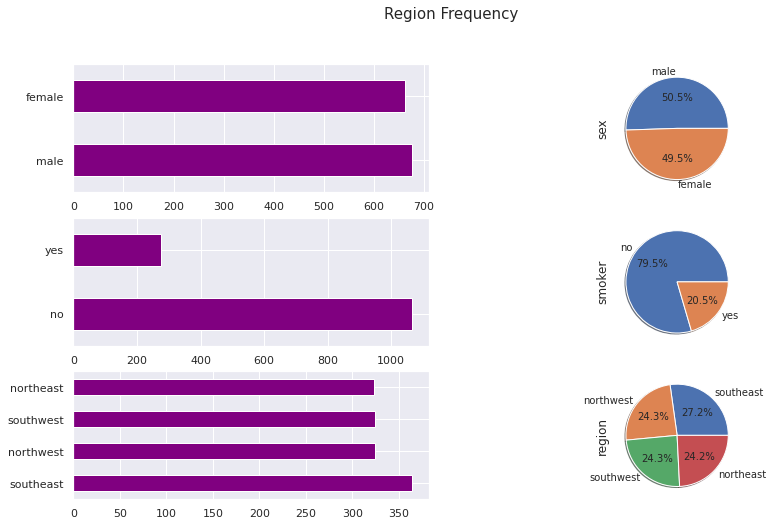

In [8]:
#Plotting Categorical Variables
fig, ax = plt.subplots(3, 2 ,figsize=(14,8))
raw_data["sex"].value_counts().plot.barh(color="purple", ax=ax[0,0])
raw_data["sex"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[0,1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=45)

raw_data["smoker"].value_counts().plot.barh(color="purple", ax=ax[1,0])
raw_data["smoker"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1,1])
fig.suptitle("Smoking Frequency", fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=45)

raw_data["region"].value_counts().plot.barh(color="purple", ax=ax[2,0])
raw_data["region"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[2,1])
fig.suptitle("Region Frequency", fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=45)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x3600 with 0 Axes>

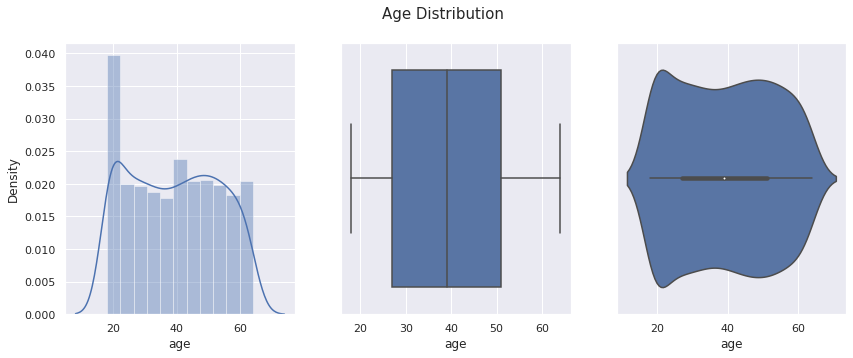

<Figure size 1440x3600 with 0 Axes>

In [9]:
#Plotting Numerical Variables
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(raw_data["age"], ax=ax[0])
sns.boxplot(raw_data["age"], ax=ax[1])
sns.violinplot(raw_data["age"], ax=ax[2])
plt.figure(figsize=(20,50))


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

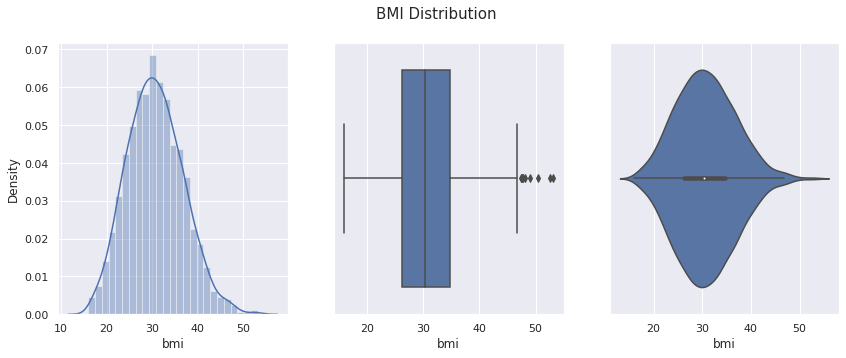

In [10]:
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("BMI Distribution", fontsize=15)
sns.distplot(raw_data["bmi"], ax=ax[0])
sns.boxplot(raw_data["bmi"], ax=ax[1])
sns.violinplot(raw_data["bmi"], ax=ax[2])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='children'>

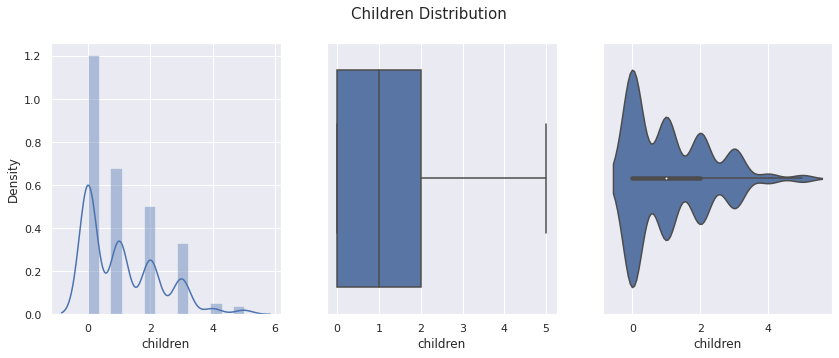

In [11]:
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("Children Distribution", fontsize=15)
sns.distplot(raw_data["children"], ax=ax[0])
sns.boxplot(raw_data["children"], ax=ax[1])
sns.violinplot(raw_data["children"], ax=ax[2])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='charges'>

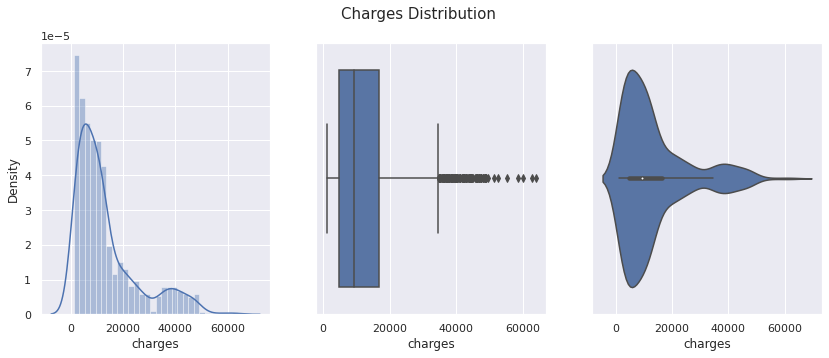

In [12]:
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("Charges Distribution", fontsize=15)
sns.distplot(raw_data["charges"], ax=ax[0])
sns.boxplot(raw_data["charges"], ax=ax[1])
sns.violinplot(raw_data["charges"], ax=ax[2])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

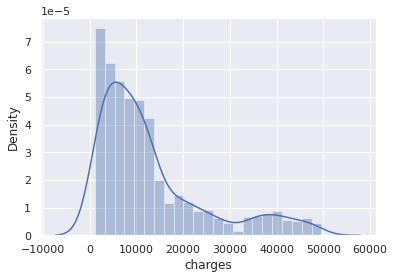

In [13]:
#removing outliers considering charges pdf
indexNames = data_processed[ data_processed['charges'] >= 50000 ].index #you can use & formulti conditions
data_processed.drop(indexNames , inplace=True)
sns.distplot(data_processed['charges'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

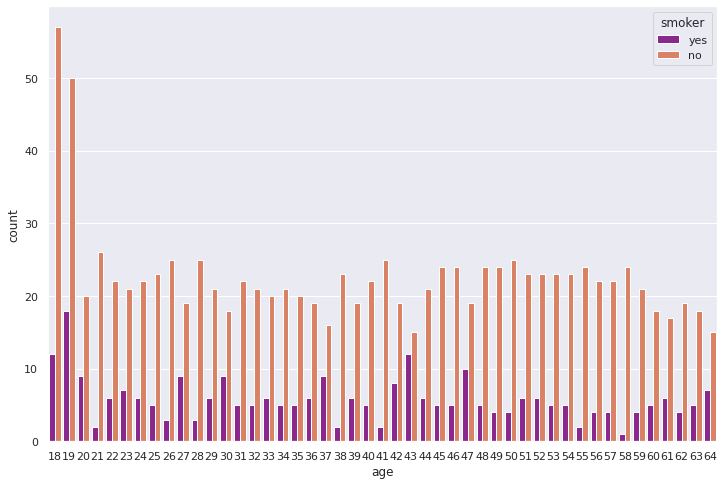

In [14]:
#age vs smoker
plt.figure(figsize=(12,8))
a=raw_data["age"].sort_values()
sns.countplot(a,hue=raw_data["smoker"],palette="plasma")

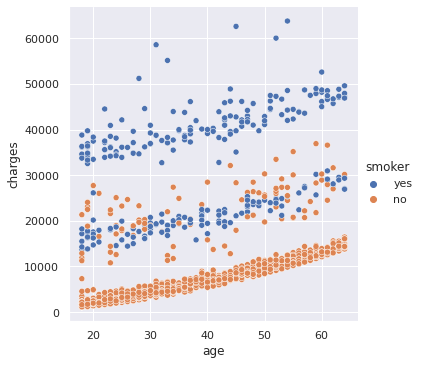

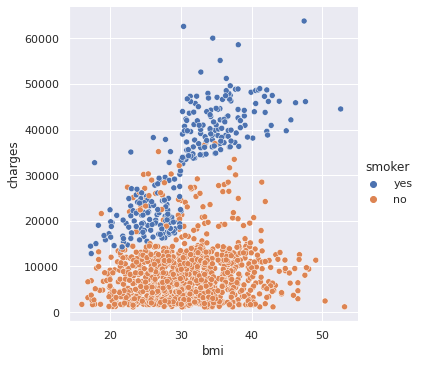

In [15]:
sns.relplot(x="age", y="charges", hue="smoker", data=data)
sns.relplot(x="bmi", y="charges", hue="smoker", data=data)
plt.show()

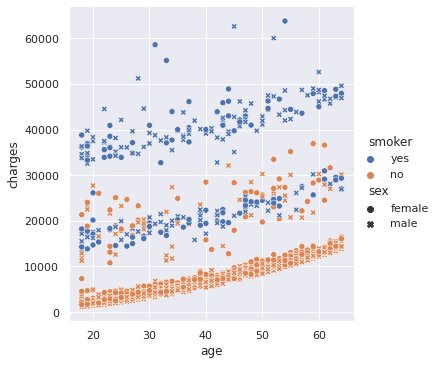

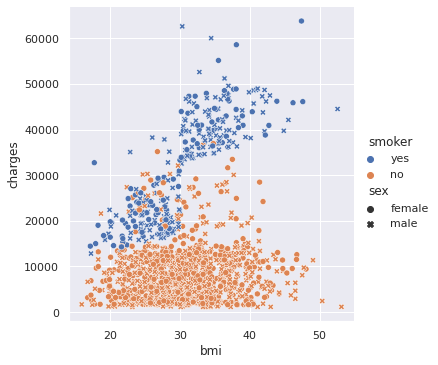

In [16]:
sns.relplot(x="age", y="charges", hue="smoker", style="sex",data=data)
sns.relplot(x="bmi", y="charges", hue="smoker", style="sex",data=data)

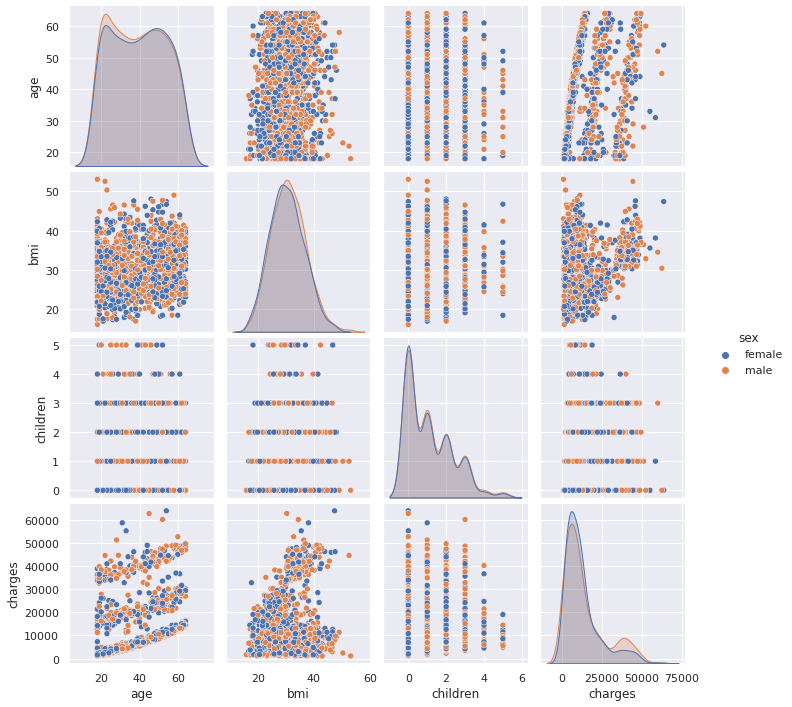

In [17]:
sns.pairplot(raw_data, hue="sex")

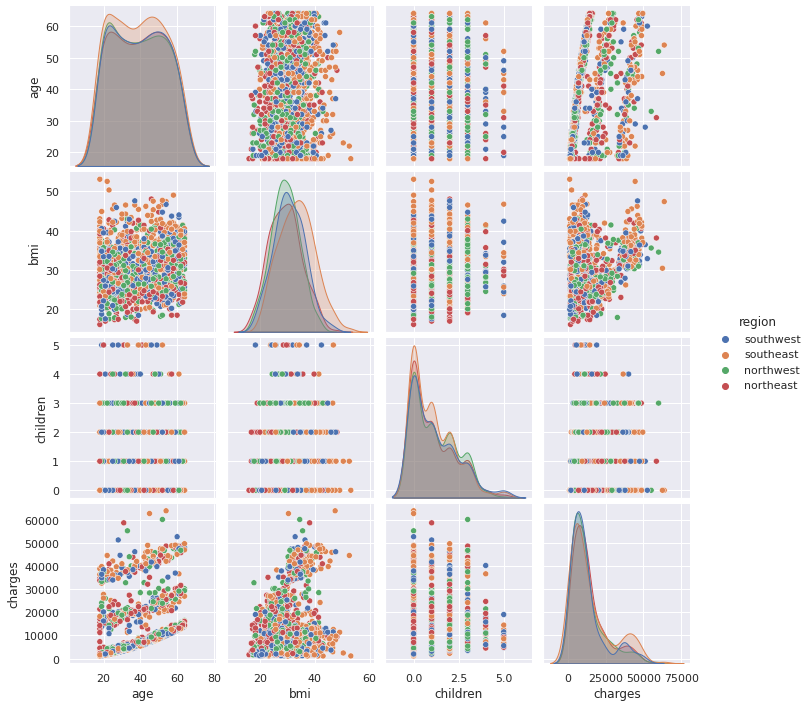

In [18]:
sns.pairplot(raw_data, hue="region")

## Checking and Relaxing the OLS assumptions

### linearity

In [19]:
# as you see in replot charges and age or charges and bmi are highly scattered so i will use log scale
log_charges = np.log(data_processed['charges'])
data_processed['log_charges'] = log_charges

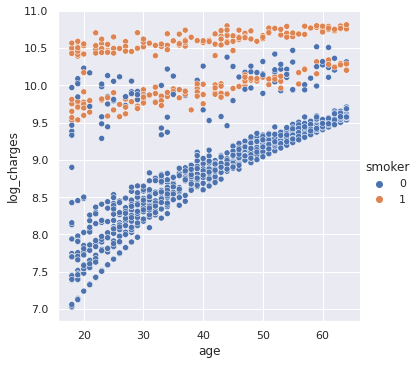

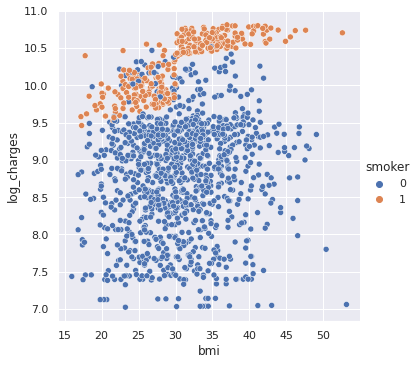

In [20]:
sns.relplot(x="age", y="log_charges", hue="smoker", data=data_processed);
sns.relplot(x="bmi", y="log_charges", hue="smoker", data=data_processed);

### Multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_processed[['bmi','age']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,7.440823,bmi
1,7.440823,age


## Multilinear model

In [22]:
X = data_processed.iloc[:, :-2].values
y = data_processed.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,2]] = sc.fit_transform(X_train[:, [0,2]])
X_test[:, [0,2]] = sc.transform(X_test[:, [0,2]])

In [24]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 9.86  9.96]
 [ 9.36  9.45]
 [ 8.87  8.95]
 [11.34 10.7 ]
 [ 8.42  8.49]
 [ 9.7   9.9 ]
 [ 7.9   7.44]
 [ 9.45  9.71]
 [10.72 10.47]
 [ 9.66  9.94]
 [ 9.61  9.95]
 [ 9.37  9.39]
 [ 7.86  7.39]
 [ 8.27  8.12]
 [ 8.54  8.58]
 [ 8.77  8.84]
 [ 8.13  8.02]
 [ 9.22  9.81]
 [ 8.9   9.57]
 [10.45 10.54]
 [10.08 10.44]
 [ 9.06  9.2 ]
 [10.19 10.46]
 [ 8.28  8.23]
 [11.53 10.76]
 [ 8.12  8.13]
 [ 7.98  7.7 ]
 [ 8.04  7.71]
 [ 8.81  9.53]
 [ 8.62  8.69]
 [ 9.12  9.25]
 [11.66 10.77]
 [ 7.83  7.34]
 [ 9.56  9.52]
 [ 9.04  9.14]
 [ 7.93  7.12]
 [ 8.69  8.69]
 [ 8.82  8.89]
 [ 8.26  8.9 ]
 [ 8.13  8.01]
 [ 8.8   8.86]
 [11.03 10.69]
 [10.46 10.52]
 [ 8.3   8.29]
 [11.4  10.71]
 [ 9.73  9.63]
 [ 7.99  7.69]
 [ 9.7   9.94]
 [ 8.53  8.49]
 [ 7.94  7.58]
 [ 9.2   9.22]
 [ 7.86  7.39]
 [ 8.43  8.42]
 [10.29 10.25]
 [ 8.35  8.26]
 [10.35 10.22]
 [ 8.36  8.31]
 [ 9.28  9.34]
 [ 8.42  8.54]
 [ 8.7   8.79]
 [ 8.41  8.43]
 [ 8.45  8.64]
 [ 9.58  9.48]
 [ 8.68  8.73]
 [ 9.    9.04]
 [11.37 10.69]
 [11.23 10

In [26]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8876960506459592

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.20 %
Standard Deviation: 1.85 %


In [28]:
regressor.intercept_
regressor.coef_
inputs = data_processed.drop(['charges'],axis=1)
inputs = inputs.drop(['log_charges'],axis=1)
regressor_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
regressor_summary['Weights'] = regressor.coef_
coff = pd.DataFrame([['intercept',regressor.intercept_]], columns=['Features','Weights'])
regressor_summary = pd.concat([regressor_summary, coff])
regressor_summary

,Features,Weights
0,age,0.278675
1,sex,-0.050086
2,bmi,-0.038038
3,children,0.074565
4,smoker,0.180595
5,northwest region,0.000059
6,southeast region,0.012156
7,southwest region,-0.050305
0,intercept,8.245705


In [29]:
dataframe_performance = pd.DataFrame(np.exp(y_pred), columns = ['predictions'])
dataframe_performance['target'] = np.exp(y_test)
dataframe_performance['Residual'] = dataframe_performance['target'] - dataframe_performance['predictions']
dataframe_performance['Difference%'] = np.absolute(dataframe_performance['Residual']/dataframe_performance['target']*100)

pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataframe_performance.sort_values(by=['Difference%'])

,predictions,target,Residual,Difference%
100,12649.62,12646.21,-3.41,0.03
189,4566.13,4571.41,5.28,0.12
220,12063.89,12044.34,-19.55,0.16
266,4660.16,4670.64,10.48,0.22
180,4907.68,4894.75,-12.92,0.26
159,8214.08,8252.28,38.20,0.46
36,5964.39,5926.85,-37.55,0.63
75,11516.45,11436.74,-79.71,0.70
205,4754.39,4718.20,-36.18,0.77
43,4004.63,3972.92,-31.71,0.80


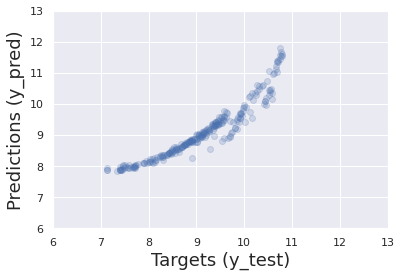

In [30]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()